In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

### 累計レポート
# 標準ライブラリ
import os
from datetime import datetime, timedelta
from typing import List, Dict, Tuple, Optional, Callable

# サードパーティライブラリ
import polars as pl
from pandas import Timedelta
import matplotlib.pyplot as plt
import japanize_matplotlib
from matplotlib.ticker import ScalarFormatter
from IPython.display import Markdown, display

# プロジェクト内モジュール
import gamedata as g

report_date = datetime(2025, 12, 31)

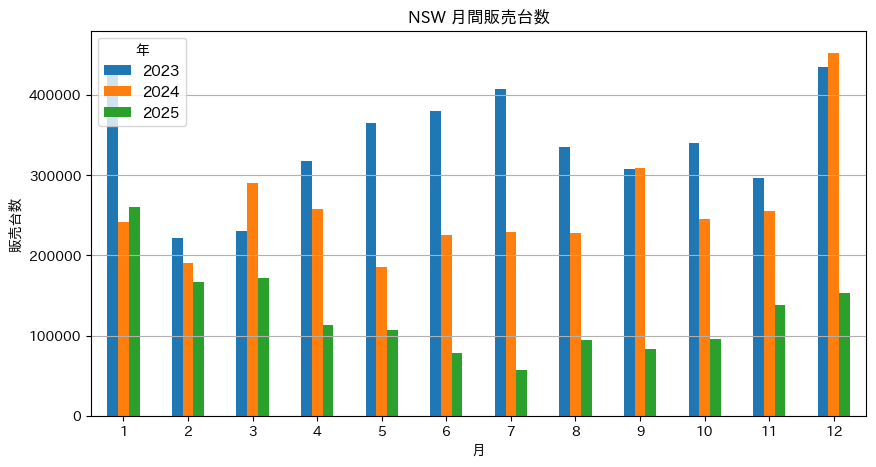

In [3]:
(fig, df) = g.plot_monthly_bar_by_year(hw="NSW", ymax=480000, 
                                       begin=g.years_ago(report_date, 2), end=report_date)

In [4]:
df

month,2023,2024,2025
i16,i64,i64,i64
1,"428,103","241,282","260,447"
2,"221,041","190,786","167,188"
3,"230,664","289,673","171,921"
4,"317,914","257,515","113,513"
5,"364,484","185,821","106,506"
6,"380,160","225,316","78,097"
7,"407,096","229,316","57,532"
8,"334,436","227,913","94,517"
9,"307,447","308,404","82,946"


In [5]:
this_year = 2025
df = df.drop("2023")
df = df.with_columns(
    YoY = pl.col(str(this_year)) / pl.col(str(this_year - 1))
)
df

month,2024,2025,YoY
i16,i64,i64,f64
1,"241,282","260,447",1.08
2,"190,786","167,188",0.88
3,"289,673","171,921",0.59
4,"257,515","113,513",0.44
5,"185,821","106,506",0.57
6,"225,316","78,097",0.35
7,"229,316","57,532",0.25
8,"227,913","94,517",0.41
9,"308,404","82,946",0.27


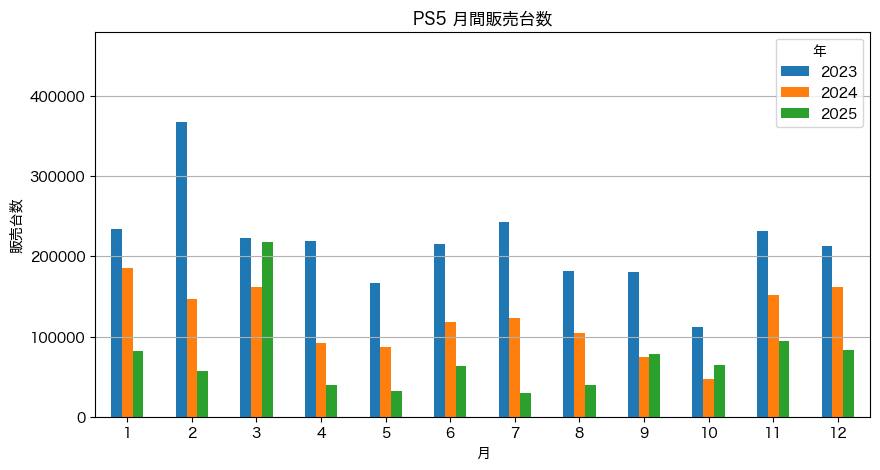

In [7]:
(fig, df) = g.plot_monthly_bar_by_year(hw="PS5", ymax=480000, begin=g.years_ago(report_date), end=report_date)

In [ ]:
this_year = 2025
df = df.drop("2023")
df = df.with_columns(
    YoY = pl.col(str(this_year)) / pl.col(str(this_year - 1))
)
df


month,2024,2025,YoY
i16,i64,i64,f64
1,"185,480","81,587",0.44
2,"146,945","56,886",0.39
3,"162,281","218,300",1.35
4,"91,981","38,983",0.42
5,"87,218","32,001",0.37
6,"117,592","63,516",0.54
7,"123,087","28,959",0.24
8,"104,178","39,004",0.37
9,"74,523","78,693",1.06
